Purpose: Run hierarchical clustering of treatments (corrected with `pyComBat` and uncorrected log2 TPM) to see relatedness of stress responses.<br>
Author: Anna Pardo<br>
Date initiated: May 16, 2023

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import statistics

In [2]:
# load variance thresholded, log transformed TPM (non-pyComBat)
vttpm_log = pd.read_csv("../../data/logTPM_allsamples_16-May-2023.txt",sep="\t",header="infer")
vttpm_log.head()

,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,B73xMO17_HII_1_BRB1,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B73xMO17_HII_2_BRB3,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B73xMO17_HI_2_BRB4,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B73xMO17_HII_3_BRB4,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B73xMO17_HI_3_BRB6,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# load variance thresholded, log transformed, pyComBat corrected TPM
cor_vttpm_log = pd.read_csv("../../data/logTPM_all_variance_thresholded_pyComBat_16-May-2023.txt",sep="\t",header="infer",index_col="GeneID")
cor_vttpm_log.head()

,B73xMO17_HII_1_BRB1,B73xMO17_HII_2_BRB3,B73xMO17_HI_2_BRB4,B73xMO17_HII_3_BRB4,B73xMO17_HI_3_BRB6,B73xMO17_HIV_1_BRB1,B73xMO17_HIII_1_BRB1,B73xMO17_HIV_2_BRB3,B73xMO17_HIII_2_BRB3,B73xMO17_HIV_3_BRB5,...,SRR11933010,SRR11933188,SRR11933232,SRR11933226,SRR11933391,SRR11933084,SRR11932980,SRR4431530,SRR11933278,SRR11933248
GeneID,,,,,,,,,,,,,,,,,,,,,
Zm00001eb000010,2.769565,2.334767,2.552252,3.186022,1.953621,3.515894,3.875824,1.921371,3.082829,2.247163,...,2.375784,3.964715,3.190441,3.077803,2.801102,4.594984,3.409986,1.220956,1.959527,3.625810
Zm00001eb000020,4.149382,2.315277,1.660353,3.483700,2.682831,1.716275,2.763618,2.711672,3.040942,1.459189,...,1.649246,2.913537,1.296736,3.017544,2.726642,2.974415,0.467465,0.081953,1.137160,2.535314
Zm00001eb000050,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.263859,0.697377,0.263859,...,0.032187,0.032187,0.032187,0.032187,0.032187,1.353248,0.032187,0.032187,0.172503,0.032187
Zm00001eb000060,6.423797,3.766544,3.979446,3.537219,1.945372,2.657075,1.945372,2.302172,4.365454,1.945372,...,1.993777,3.699867,3.041091,3.505962,2.237272,4.220048,0.479568,1.489815,2.876463,3.922885
Zm00001eb000070,0.907244,0.907244,1.130091,1.170668,0.907244,0.907244,0.907244,1.230060,0.907244,1.056085,...,2.770631,2.886049,0.914455,2.719009,1.590877,1.666365,1.565698,0.172075,2.869826,1.603326


In [4]:
# transpose cor_vttpm_log
cor_vttpm_log = cor_vttpm_log.transpose()
cor_vttpm_log.reset_index(inplace=True)
cor_vttpm_log.rename(columns={"index":"Sample"},inplace=True)
cor_vttpm_log.head()

GeneID,Sample,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,...,Zm00001eb442810,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030
0,B73xMO17_HII_1_BRB1,2.769565,4.149382,0.263859,6.423797,0.907244,3.285251,0.211369,0.154834,0.282880,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
1,B73xMO17_HII_2_BRB3,2.334767,2.315277,0.263859,3.766544,0.907244,2.811829,0.211369,0.154834,0.543265,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
2,B73xMO17_HI_2_BRB4,2.552252,1.660353,0.263859,3.979446,1.130091,2.769591,0.211369,0.154834,0.282880,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
3,B73xMO17_HII_3_BRB4,3.186022,3.483700,0.263859,3.537219,1.170668,2.900447,0.211369,0.154834,0.867950,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098
4,B73xMO17_HI_3_BRB6,1.953621,2.682831,0.263859,1.945372,0.907244,2.337569,0.211369,0.154834,0.618738,...,0.162619,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098


In [5]:
# load metadata sheet
md = pd.read_csv("../../data/srr_numbers_with_metadata_12-May-2023.csv",sep=",",header="infer")
md.head()

,BioProject,Sample,sample_name,Replicate_num,Genotype,Technology,Library_layout,Treatment,Duration_hours,Time_after_treatment,...,Developmental_stage,Tissue,Day_length_hours,Day_temp_C,Night_temp_C,Relative humidity (%),Light (umol/m2/s),Growth Env.,Media,Notes
0,PRJNA637522,SRR11933261,238_WS2,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
1,PRJNA637522,SRR11933272,238_WS1,NaN,238,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
2,PRJNA637522,SRR11933250,268_WS1,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
3,PRJNA637522,SRR11933029,268_WW,NaN,268,Illumina HiSeq 2500,PAIRED,Control,216.0,9 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN
4,PRJNA637522,SRR11933040,268_WS2,NaN,268,Illumina HiSeq 2500,PAIRED,Drought,312.0,13 days,...,V3,Leaf,16.0,25.0,NaN,NaN,NaN,Greenhouse,NaN,NaN


In [6]:
# merge logTPM with metadata: start for non-pyComBat data
vttpm_log_merged = vttpm_log.merge(md[["Sample","Treatment"]],how="inner")
vttpm_log_merged.drop("Sample",axis=1,inplace=True)
vttpm_log_merged.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030,Treatment
0,1.638809,2.220060,0.0,3.608334,0.000000,3.246090,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
1,1.411726,1.015722,0.0,1.467345,0.000000,2.666771,0.0,0.0,0.496737,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
2,1.525312,0.585677,0.0,1.638883,0.050644,2.615085,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
3,1.856313,1.782950,0.0,1.282574,0.059865,2.775211,0.0,0.0,1.116139,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control
4,1.212664,1.257071,0.0,0.000000,0.000000,2.086426,0.0,0.0,0.640717,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Control


In [7]:
# now merge for pyComBat data
cor_vttpm_log_merged = cor_vttpm_log.merge(md[["Sample","Treatment"]],how="inner")
cor_vttpm_log_merged.drop("Sample",axis=1,inplace=True)
cor_vttpm_log_merged.head()

,Zm00001eb000010,Zm00001eb000020,Zm00001eb000050,Zm00001eb000060,Zm00001eb000070,Zm00001eb000080,Zm00001eb000100,Zm00001eb000110,Zm00001eb000120,Zm00001eb000140,...,Zm00001eb442820,Zm00001eb442840,Zm00001eb442850,Zm00001eb442870,Zm00001eb442890,Zm00001eb442910,Zm00001eb442960,Zm00001eb442980,Zm00001eb443030,Treatment
0,2.769565,4.149382,0.263859,6.423797,0.907244,3.285251,0.211369,0.154834,0.282880,0.313661,...,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098,Control
1,2.334767,2.315277,0.263859,3.766544,0.907244,2.811829,0.211369,0.154834,0.543265,0.313661,...,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098,Control
2,2.552252,1.660353,0.263859,3.979446,1.130091,2.769591,0.211369,0.154834,0.282880,0.313661,...,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098,Control
3,3.186022,3.483700,0.263859,3.537219,1.170668,2.900447,0.211369,0.154834,0.867950,0.313661,...,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098,Control
4,1.953621,2.682831,0.263859,1.945372,0.907244,2.337569,0.211369,0.154834,0.618738,0.313661,...,0.589851,0.00378,0.018531,0.08408,0.723592,0.001349,0.065134,0.002012,0.581098,Control


In [8]:
# set a list of treatments to keep
treatments = ["Heat","Control","Salt","Low_Nitrogen","Drought","Flooding","Cold"]

In [9]:
# subset the data to only those treatments
hclust_data = vttpm_log_merged[vttpm_log_merged["Treatment"].isin(treatments)]
cor_hclust_data = cor_vttpm_log_merged[cor_vttpm_log_merged["Treatment"].isin(treatments)]

In [10]:
# group by treatment and calculate the mean
hcd = hclust_data.groupby(by="Treatment",axis=0).mean()
chcd = cor_hclust_data.groupby(by="Treatment",axis=0).mean()

In [11]:
# run hierarchical clustering
h = linkage(hcd,"ward")
ch = linkage(chcd,"ward")

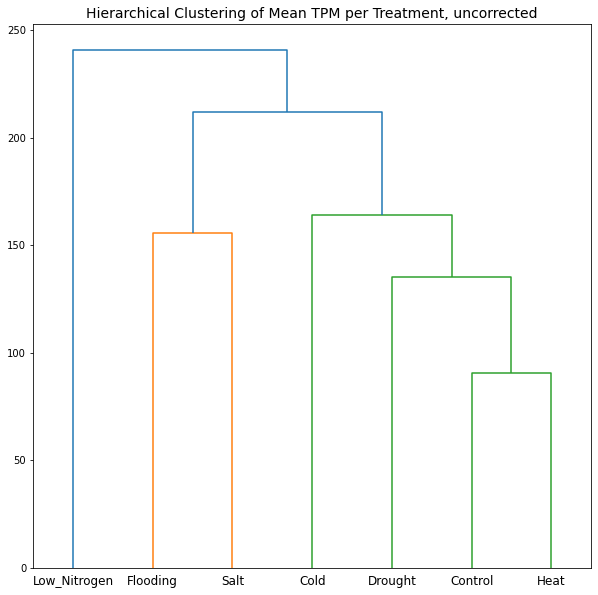

In [12]:
# plot dendrogram: non-pyComBat data
plt.figure(figsize=(10,10))
dendrogram(h,labels=hcd.index)
plt.title("Hierarchical Clustering of Mean TPM per Treatment, uncorrected",fontsize=14)
plt.show()

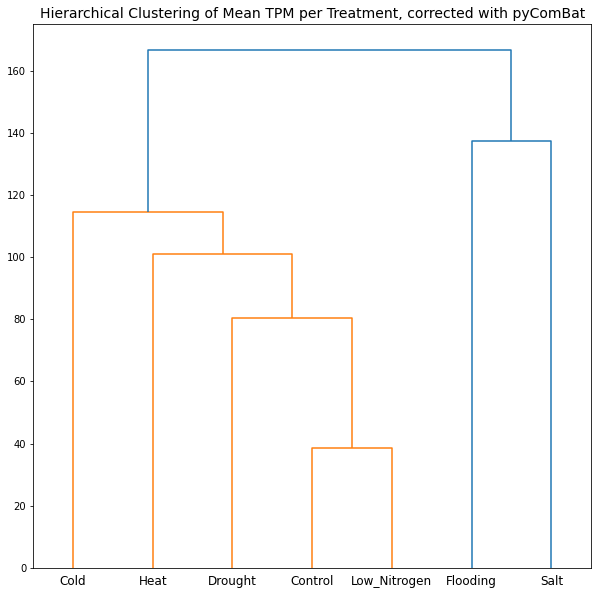

In [13]:
# plot dendrogram: pyComBat data
plt.figure(figsize=(10,10))
dendrogram(ch,labels=chcd.index)
plt.title("Hierarchical Clustering of Mean TPM per Treatment, corrected with pyComBat",fontsize=14)
plt.show()

In [14]:
# try again but with median rather than mean
hcd = hclust_data.groupby(by="Treatment",axis=0).median()
chcd = cor_hclust_data.groupby(by="Treatment",axis=0).median()

In [15]:
# run hierarchical clustering
h = linkage(hcd,"ward")
ch = linkage(chcd,"ward")

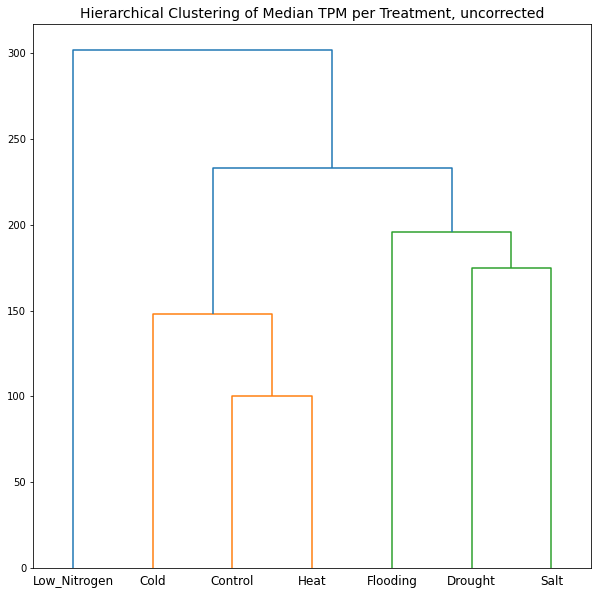

In [16]:
# plot dendrogram: non-pyComBat data
plt.figure(figsize=(10,10))
dendrogram(h,labels=hcd.index)
plt.title("Hierarchical Clustering of Median TPM per Treatment, uncorrected",fontsize=14)
plt.show()

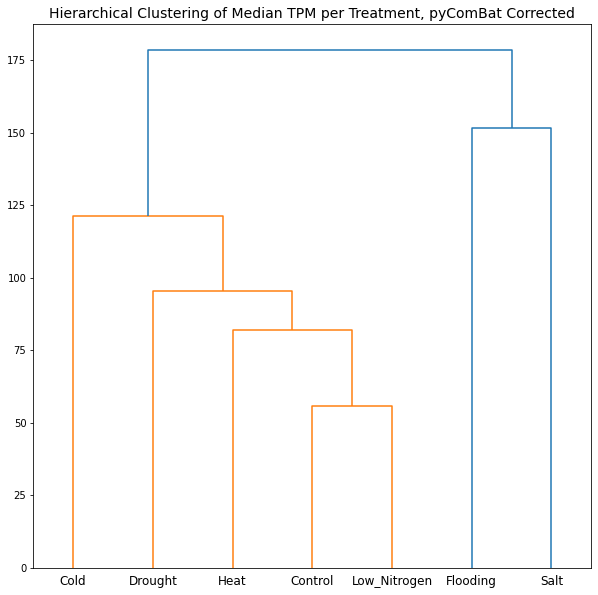

In [17]:
# plot dendrogram: pyComBat data
plt.figure(figsize=(10,10))
dendrogram(ch,labels=chcd.index)
plt.title("Hierarchical Clustering of Median TPM per Treatment, pyComBat Corrected",fontsize=14)
plt.show()